In order to include categorical features in your Machine Learning model, you have to encode them numerically using "dummy" or "one-hot" encoding. But how do you do this correctly using scikit-learn?

In this video, you'll learn how to use OneHotEncoder and ColumnTransformer to encode your categorical features and prepare your feature matrix in a single step. You'll also learn how to include this step within a Pipeline so that you can cross-validate your model and preprocessing steps simultaneously. Finally, you'll learn why you should use scikit-learn (rather than pandas) for preprocessing your dataset.

AGENDA:

0:00 Introduction

0:22 Why should you use a Pipeline?

2:30 Preview of the lesson

3:35 Loading and preparing a dataset

6:11 Cross-validating a simple model

10:00 Encoding categorical features with OneHotEncoder

15:01 Selecting columns for preprocessing with ColumnTransformer

19:00 Creating a two-step Pipeline

19:54 Cross-validating a Pipeline

21:44 Making predictions on new data

23:43 Recap of the lesson

24:50 Why should you use scikit-learn (rather than pandas) for preprocessing?

CODE FROM THIS VIDEO: https://github.com/justmarkham/scikit...

WANT TO JOIN MY NEXT LIVE WEBCAST? Become a member ($5/month):
https://www.patreon.com/dataschool


=== RELATED RESOURCES ===

OneHotEncoder documentation: https://scikit-learn.org/stable/modul...

ColumnTransformer documentation: https://scikit-learn.org/stable/modul...

Pipeline documentation: https://scikit-learn.org/stable/modul...

My video on cross-validation: https://www.youtube.com/watch?v=6dbrR...

My video on grid search: https://www.youtube.com/watch?v=Gol_q...

My lesson notebook on StandardScaler: https://nbviewer.jupyter.org/github/j...


=== WANT TO GET BETTER AT MACHINE LEARNING? ===

1) WATCH my scikit-learn video series: https://www.youtube.com/playlist?list...

2) SUBSCRIBE for more videos: https://www.youtube.com/dataschool?su...

3) ENROLL in my Machine Learning course: https://www.dataschool.io/learn/

4) LET'S CONNECT!

- Newsletter: https://www.dataschool.io/subscribe/

- Twitter: https://twitter.com/justmarkham

- Facebook: https://www.facebook.com/DataScienceS...

- LinkedIn: https://www.linkedin.com/in/justmarkham/

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('https://bit.ly/kaggletrain')

In [3]:
df1 = df.copy()

In [4]:
df1.shape

(891, 12)

In [5]:
df1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df1.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
df1 = df1.loc[df1.Embarked.notna(), ['Survived', 'Pclass', 'Sex', 'Age', 'Embarked']]
df1.sample(5)

,Survived,Pclass,Sex,Age,Embarked
162,0,3,male,26.0,S
226,1,2,male,19.0,S
612,1,3,female,NaN,Q
98,1,2,female,34.0,S
145,0,2,male,19.0,S


In [8]:
X = df1.loc[:, ['Pclass']]
y = df1['Survived']
print(X.head())
print(y.head())

   Pclass
0       3
1       1
2       3
3       1
4       3
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [9]:
from sklearn.linear_model import LogisticRegression

In [10]:
logreg = LogisticRegression(solver='lbfgs')

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
cross_val_score(logreg, X, y, cv=5, scoring='accuracy').mean()

0.6783406335301212

In [13]:
y.value_counts(normalize=True)

0    0.617548
1    0.382452
Name: Survived, dtype: float64

In [14]:
X = df1.drop('Survived', axis=1)
y = df1['Survived']
print(X.head())
print(y.head())

   Pclass     Sex   Age Embarked
0       3    male  22.0        S
1       1  female  38.0        C
2       3  female  26.0        S
3       1  female  35.0        S
4       3    male  35.0        S
0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64


In [15]:
X.shape

(889, 4)

In [16]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import make_column_transformer

In [17]:
ohe = OneHotEncoder(sparse=False)
imp = SimpleImputer()

In [18]:
ohe.fit_transform(df1[['Sex']])

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [0., 1.],
       [0., 1.]])

In [19]:
ohe.categories_  # 1st col = female

[array(['female', 'male'], dtype=object)]

In [20]:
ohe.fit_transform(df1[['Embarked']])

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [25]:
ohe.categories_ 

[array(['C', 'Q', 'S'], dtype=object)]

In [21]:
X.head()

,Pclass,Sex,Age,Embarked
0,3,male,22.0,S
1,1,female,38.0,C
2,3,female,26.0,S
3,1,female,35.0,S
4,3,male,35.0,S


In [22]:
ct = make_column_transformer(
    (ohe, ['Sex', 'Embarked']),
    (imp, ['Age']),
    remainder='passthrough')

In [23]:
ct.fit_transform(X)

array([[ 0.       ,  1.       ,  0.       , ...,  1.       , 22.       ,
         3.       ],
       [ 1.       ,  0.       ,  1.       , ...,  0.       , 38.       ,
         1.       ],
       [ 1.       ,  0.       ,  0.       , ...,  1.       , 26.       ,
         3.       ],
       ...,
       [ 1.       ,  0.       ,  0.       , ...,  1.       , 29.6420927,
         3.       ],
       [ 0.       ,  1.       ,  1.       , ...,  0.       , 26.       ,
         1.       ],
       [ 0.       ,  1.       ,  0.       , ...,  0.       , 32.       ,
         3.       ]])

In [25]:
from sklearn.pipeline import make_pipeline

In [26]:
# transform the cols and make a model
pipe = make_pipeline(ct, logreg)

In [27]:
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

0.7840347870246938

# le traitement des données (ohe et ct) a permis d'améliorer le score de 67.83 % à 78.40 %. D'où l'importance du traitement des données en ML 

In [33]:
# previously (X with 1 feature) the score was 0.6783406335301212, and now with 2 features it's better 


In [22]:
# exclude 2 rows of Embrked witch hve no value

#df = df.loc[df.Embarked.notna(), ['Survived', 'Pclass', 'Sex', 'Embarked']]

In [31]:
# making some new data

X_new = X.sample(15, random_state=99)
X_new

,Pclass,Sex,Age,Embarked
599,1,male,49.0,C
512,1,male,36.0,S
273,1,male,37.0,C
215,1,female,31.0,C
790,3,male,NaN,Q
620,3,male,27.0,C
87,3,male,NaN,S
137,1,male,37.0,S
764,3,male,16.0,S
654,3,female,18.0,Q


In [32]:
pipe.fit(X, y)

Pipeline(memory=None,
         steps=[('columntransformer',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories='auto',
                                                                drop=None,
                                                                dtype=<class 'numpy.float64'>,
                                                                handle_unknown='error',
                                                                sparse=False),
                                                  ['Sex', 'Embarked']),
                                                 ('simpleimputer',
                                                  SimpleImputer(add_indicat...
                                            

In [33]:
pipe.predict(X_new)

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0], dtype=int64)

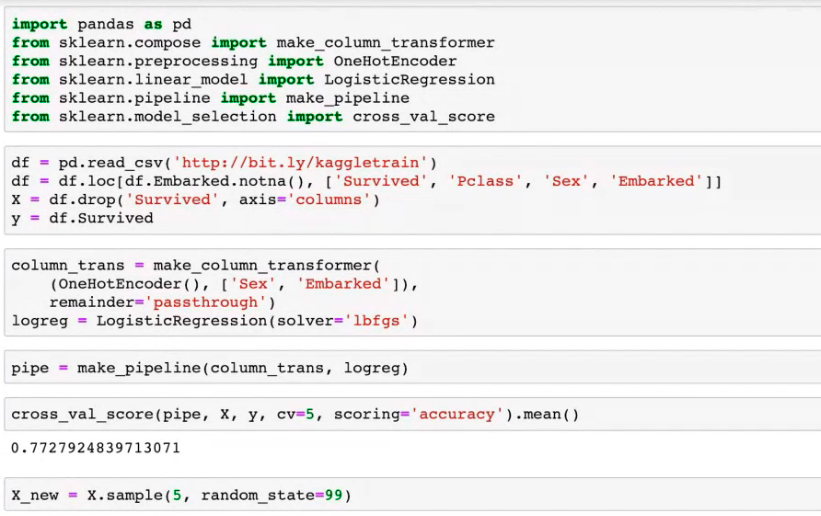